<a href="https://colab.research.google.com/github/Abicumaran/Abicumaran/blob/main/Decision_Trees_FTIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
import pandas as pd
from google.colab import files
data= files.upload()
import io
data = pd.read_csv(io.BytesIO(data['FTIR2.csv']))

Saving FTIR2.csv to FTIR2.csv


In [ ]:
data.head()

Diagnosis  698.22975  702.08737  ...  3992.63973  3996.49735  4000.35497
0          1    0.03308    0.03432  ...     0.08768     0.08791     0.08798
1          1    0.04072    0.04187  ...     0.08886     0.08953     0.08975
2          1    0.01291    0.01460  ...     0.06696     0.06684     0.06667
3          1    0.02987    0.03179  ...     0.08571     0.08586     0.08603
4          1    0.16648    0.16896  ...     0.10281     0.10267     0.10291

[5 rows x 858 columns]

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [ ]:
#define Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy')
#Define input vectors
#X is the features in this dataset
x = data['698.22975'].values.reshape(-1,1)
#Y is the vector with our Target Variables
y = data['Diagnosis'].values
#start fitting process
dt.fit(x, y)

tree_graph_to_png(dt, feature_names=['Raman'], 
                 png_file_to_save='dt.png')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [ ]:
model = dt

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[1 1 2 2 1 2 2]


In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[3 0]
 [0 4]]
Test Set: 7
Accuracy = 100.0 %


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, sample_weight=None, multioutput='uniform_average', squared=True)

0.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
roc_curve(y_test, predictions, pos_label=1, sample_weight=None, drop_intermediate=True)

(array([0., 1., 1.]), array([0., 0., 1.]), array([3, 2, 1]))

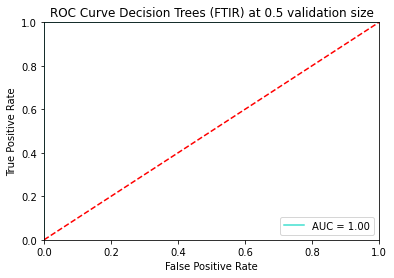

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions, pos_label = 2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve Decision Trees (FTIR) at 0.5 validation size')
plt.plot(fpr, tpr, 'turquoise', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator = dt, X= X_train, y= y_train, cv=5)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:90.00%
Standard Deviation:20.00%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import learning_curve #learningcurves

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
...     dt, x, y, cv=5,# Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 11 instead of 50).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


In [ ]:
train_mean = np.mean(train_scores, axis=1)# Create means and standard deviations of training set scores
train_std = np.std(train_scores, axis=1)

In [ ]:
test_mean = np.mean(test_scores, axis=1) # Create means and standard deviations of test set scores
test_std = np.std(test_scores, axis=1)

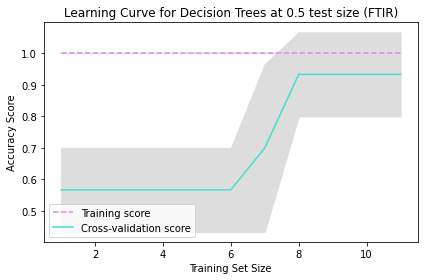

In [ ]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="violet",  label="Training score")
plt.plot(train_sizes, test_mean, color="turquoise", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve for Decision Trees at 0.5 test size (FTIR)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
d  = np.array([1.554, 1.986, 1.888, 1.6572])
d=d.reshape(-1, 1)

dt.predict(d)

array([1, 1, 1, 1])